In [1]:
import numpy as np
from scipy.signal import find_peaks

from Nprops import Nprops
from Synprops import Synprops
from Network import Network

from matplotlib import pyplot as plt
%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,5)

In [2]:
### Specify neuron properties
R = 20e-3
Er = -60e-3
n_a = Nprops(
    Cm = 5e-9,
    Gm = 1e-6,
    Er = Er,
    Am = 1,
    Sm = -50,
    Em = 2*R + Er,
    Ah = 0.5,
    Sh = 50,
    Eh = Er,
    Ena = 110e-3 + Er,
    tauh_max = 0.250,
    Gna = 1.9493223982564208591225334010754721703051473014056682586669921875e-06
)

### List neurons in the network
neurons = [n_a]*4

In [3]:
### Specify synapse properties
s_a = Synprops(
    gmax = 7.86971519804733567581413004876633721096368390135467052459716796875e-07,
    Esyn = -40e-3 + Er,
    Ehi = R + Er,
    Elo = Er
)
s_b = Synprops(
    gmax = 4.2551104842347686800385782833477943398747811443172395229339599609375e-07,
    Esyn = -40e-3 + Er,
    Ehi = R + Er,
    Elo = Er
)

In [4]:
### List synapses in the network [from, to, props]. Indices must match neurons array
synapses = [
         [1, 0, s_a]
        ,[2, 0, s_a]
        ,[3, 0, s_b]

        ,[0, 1, s_b]
        ,[2, 1, s_a]
        ,[3, 1, s_a]

        ,[0, 2, s_a]
        ,[1, 2, s_b]
        ,[3, 2, s_a]

        ,[0, 3, s_a]
        ,[1, 3, s_a]
        ,[2, 3, s_b]
]

In [5]:
### Define applied currents and simulation duration
tf = 30
dt = 1e-4
num_timesteps = len(np.arange(0, tf+dt, dt))

Iapps = np.zeros((num_timesteps, len(neurons)))
Iapps[0][0] = 2.0e-8

def Iapps_func(t):
    Iapps = np.zeros(len(neurons))
    if t == 0:
        Iapps[0] = 2.0e-8
    return Iapps

# Peak detection to check for oscillation period

## Euler - stable

<IPython.core.display.Javascript object>


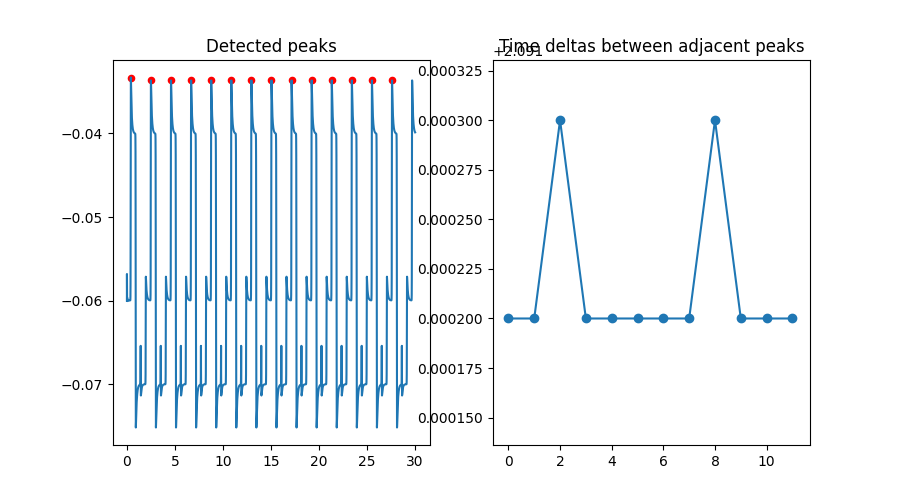

Text(0.5, 1.0, 'Time deltas between adjacent peaks')

In [6]:
network = Network(neurons, synapses)
network.SetSimulationProperties(tf, dt, Iapps)
network.Simulate()

y = network.Vs[:,3]
x = network.ts

fig, axs = plt.subplots(1, 2)
axs[0].plot(x,y)

peaks = find_peaks(y, prominence=0.01)[0]
axs[0].scatter(x[peaks], y[peaks], s=20, c='red')
axs[0].set_title("Detected peaks")

deltas = np.diff(x[peaks])[1:]
axs[1].plot(deltas, 'o-')
axs[1].set_title("Time deltas between adjacent peaks")

## RK23 - stable when tolerance is raised

<IPython.core.display.Javascript object>


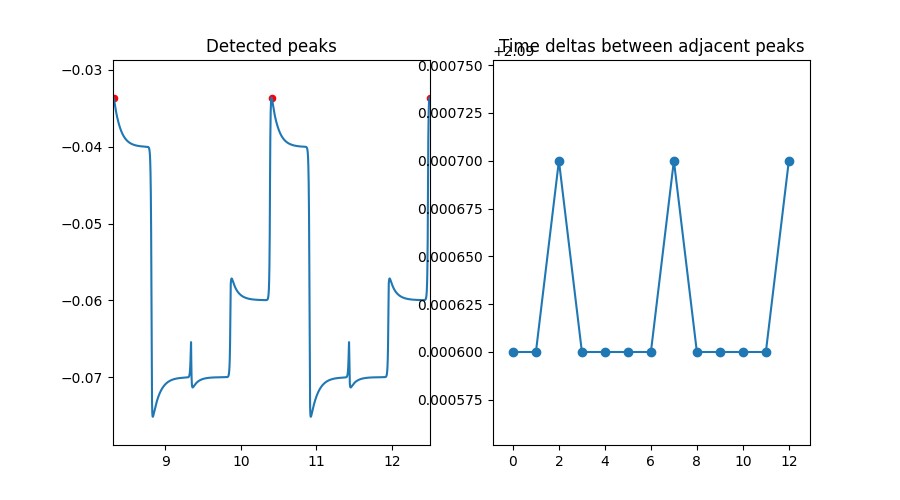

Text(0.5, 1.0, 'Time deltas between adjacent peaks')

In [17]:
network2 = Network(neurons, synapses)
network2.SetSimulationPropertiesRK(tf, dt, Iapps_func)
Vs, hs = network2.SimulateRK(method='RK23', atol=1e-9, rtol=1e-9)

y = Vs[0]
x = network2.ts

fig, axs = plt.subplots(1, 2)
axs[0].plot(x,y)

peaks = find_peaks(y, prominence=0.01)[0]
axs[0].scatter(x[peaks], y[peaks], s=20, c='red')
axs[0].set_title("Detected peaks")

deltas = np.diff(x[peaks])[1:]
axs[1].plot(deltas, 'o-')
axs[1].set_title("Time deltas between adjacent peaks")

## RK23 - less stable with default tolerance

<IPython.core.display.Javascript object>


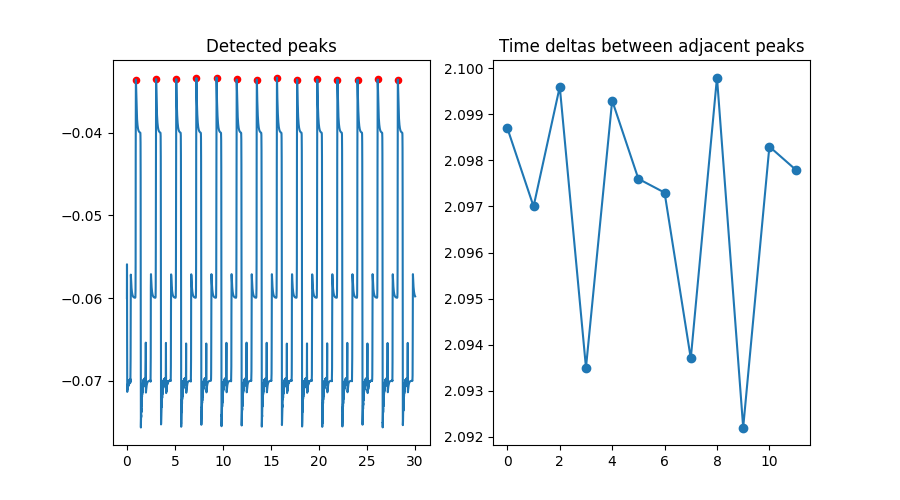

Text(0.5, 1.0, 'Time deltas between adjacent peaks')

In [18]:
network2 = Network(neurons, synapses)
network2.SetSimulationPropertiesRK(tf, dt, Iapps_func)
Vs, hs = network2.SimulateRK(method='RK23')

y = Vs[0]
x = network2.ts

fig, axs = plt.subplots(1, 2)
axs[0].plot(x,y)

peaks = find_peaks(y, prominence=0.01)[0]
axs[0].scatter(x[peaks], y[peaks], s=20, c='red')
axs[0].set_title("Detected peaks")

deltas = np.diff(x[peaks])[1:]
axs[1].plot(deltas, 'o-')
axs[1].set_title("Time deltas between adjacent peaks")

## RK45 (default scipy solver) - more stable than Euler if tolerance is raised

<IPython.core.display.Javascript object>


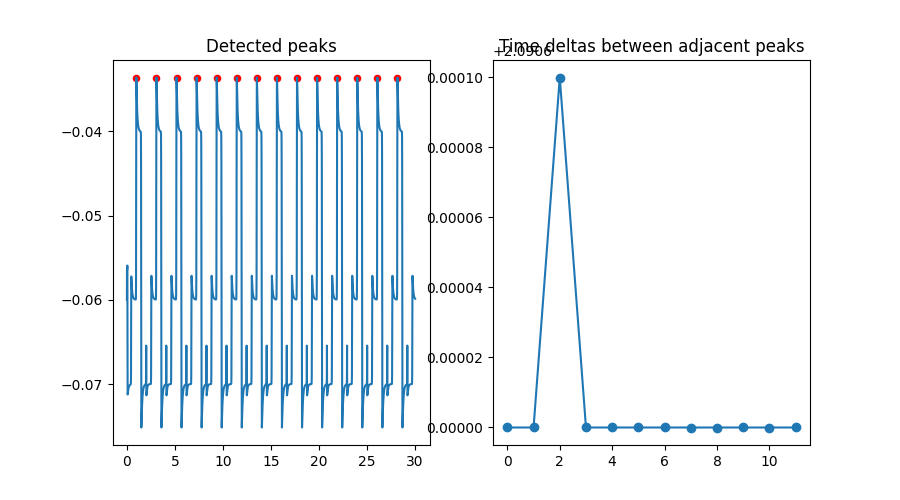

Text(0.5, 1.0, 'Time deltas between adjacent peaks')

In [20]:
network2 = Network(neurons, synapses)
network2.SetSimulationPropertiesRK(tf, dt, Iapps_func)
Vs, hs = network2.SimulateRK(atol=1e-9, rtol=1e-9)

y = Vs[0]
x = network2.ts

fig, axs = plt.subplots(1, 2)
axs[0].plot(x,y)

peaks = find_peaks(y, prominence=0.01)[0]
axs[0].scatter(x[peaks], y[peaks], s=20, c='red')
axs[0].set_title("Detected peaks")

deltas = np.diff(x[peaks])[1:]
axs[1].plot(deltas, 'o-')
axs[1].set_title("Time deltas between adjacent peaks")

## LSODA - increasing tolerance gives stability, unstable otherwise

<IPython.core.display.Javascript object>


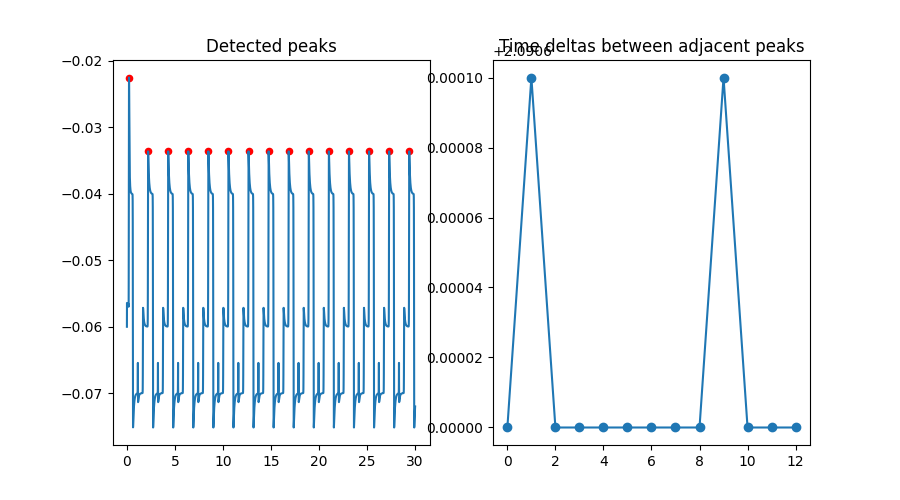

Text(0.5, 1.0, 'Time deltas between adjacent peaks')

In [21]:
network2 = Network(neurons, synapses)
network2.SetSimulationPropertiesRK(tf, dt, Iapps_func)
Vs, hs = network2.SimulateRK(method='LSODA', atol=1e-9, rtol=1e-9)

y = Vs[0]
x = network2.ts

fig, axs = plt.subplots(1, 2)
axs[0].plot(x,y)

peaks = find_peaks(y, prominence=0.01)[0]
axs[0].scatter(x[peaks], y[peaks], s=20, c='red')
axs[0].set_title("Detected peaks")

deltas = np.diff(x[peaks])[1:]
axs[1].plot(deltas, 'o-')
axs[1].set_title("Time deltas between adjacent peaks")

## Radau - ???

<IPython.core.display.Javascript object>


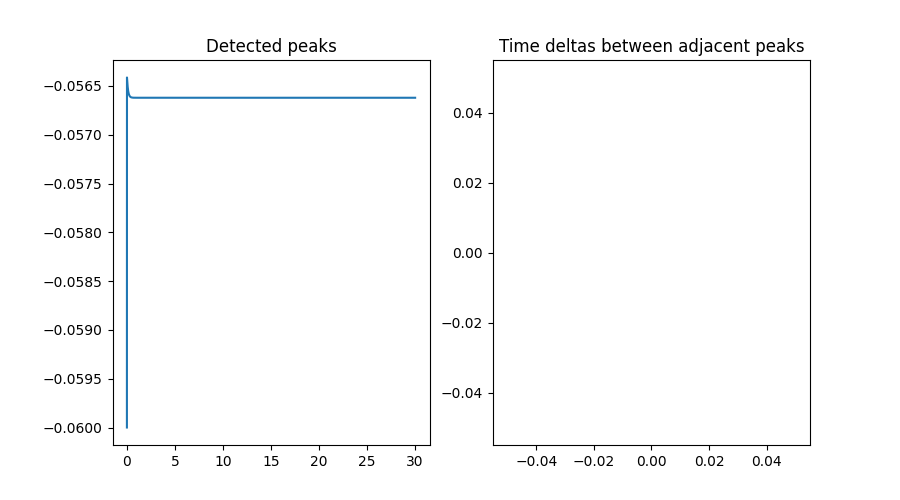

Text(0.5, 1.0, 'Time deltas between adjacent peaks')

In [10]:
network2 = Network(neurons, synapses)
network2.SetSimulationPropertiesRK(tf, dt, Iapps_func)
Vs, hs = network2.SimulateRK(method='Radau')

y = Vs[0]
x = network2.ts

fig, axs = plt.subplots(1, 2)
axs[0].plot(x,y)

peaks = find_peaks(y, prominence=0.01)[0]
axs[0].scatter(x[peaks], y[peaks], s=20, c='red')
axs[0].set_title("Detected peaks")

deltas = np.diff(x[peaks])[1:]
axs[1].plot(deltas, 'o-')
axs[1].set_title("Time deltas between adjacent peaks")

## BDF - very unstable

<IPython.core.display.Javascript object>


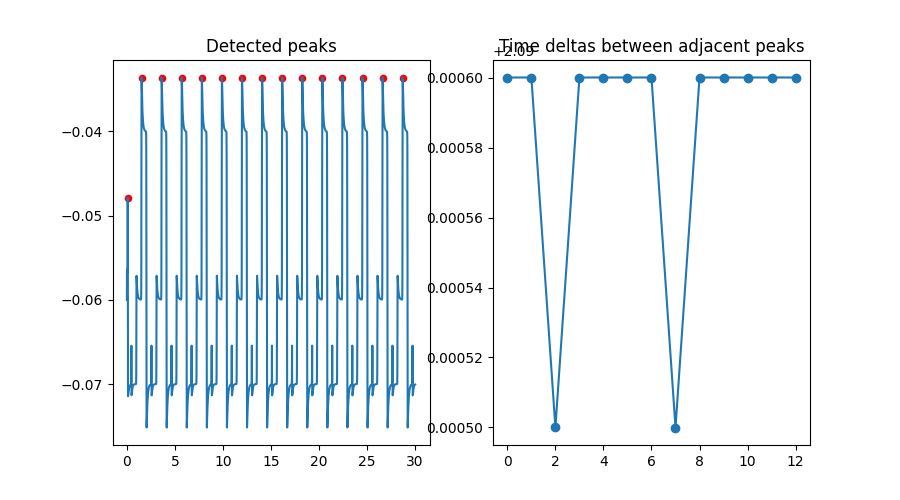

Text(0.5, 1.0, 'Time deltas between adjacent peaks')

In [22]:
network2 = Network(neurons, synapses)
network2.SetSimulationPropertiesRK(tf, dt, Iapps_func)
Vs, hs = network2.SimulateRK(method='BDF',atol=1e-9, rtol=1e-9)

y = Vs[0]
x = network2.ts

fig, axs = plt.subplots(1, 2)
axs[0].plot(x,y)

peaks = find_peaks(y, prominence=0.01)[0]
axs[0].scatter(x[peaks], y[peaks], s=20, c='red')
axs[0].set_title("Detected peaks")

deltas = np.diff(x[peaks])[1:]
axs[1].plot(deltas, 'o-')
axs[1].set_title("Time deltas between adjacent peaks")